In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-shows/netflix_titles.csv


In [2]:
import pandas as pd
import numpy as np
import random as rnd
import geopandas as gpd
%matplotlib inline
from collections import Counter
import re
from sklearn.linear_model import LinearRegression

import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
netflix = pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')

In [4]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
netflix.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [6]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [7]:
null_columns=netflix.columns[netflix.isnull().any()]
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
netflix.dropna()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [9]:
country_counts = netflix.groupby('country').size().sort_values(ascending=False)

print(country_counts.head(20))

country
United States                    2818
India                             972
United Kingdom                    419
Japan                             245
South Korea                       199
Canada                            181
Spain                             145
France                            124
Mexico                            110
Egypt                             106
Turkey                            105
Nigeria                            95
Australia                          87
Taiwan                             81
Indonesia                          79
Brazil                             77
United Kingdom, United States      75
Philippines                        75
United States, Canada              73
Germany                            67
dtype: int64


In [10]:
cast_lists = netflix['cast'].str.split(', ')

# Count the players and sort them from largest to smallest
cast_counts = cast_lists.explode().value_counts().sort_values(ascending=False)

print(cast_counts.head(20))

Anupam Kher          43
Shah Rukh Khan       35
Julie Tejwani        33
Naseeruddin Shah     32
Takahiro Sakurai     32
Rupa Bhimani         31
Akshay Kumar         30
Om Puri              30
Yuki Kaji            29
Paresh Rawal         28
Amitabh Bachchan     28
Boman Irani          27
Vincent Tong         26
Rajesh Kava          26
Andrea Libman        25
Kareena Kapoor       25
Samuel L. Jackson    24
John Cleese          24
Fred Tatasciore      23
Jigna Bhardwaj       23
Name: cast, dtype: int64


In [11]:

# get column 'listed_in' as an array and count categories
categories = netflix['listed_in'].str.split(', ').explode().value_counts()

print(categories.head(5))


International Movies      2752
Dramas                    2427
Comedies                  1674
International TV Shows    1351
Documentaries              869
Name: listed_in, dtype: int64


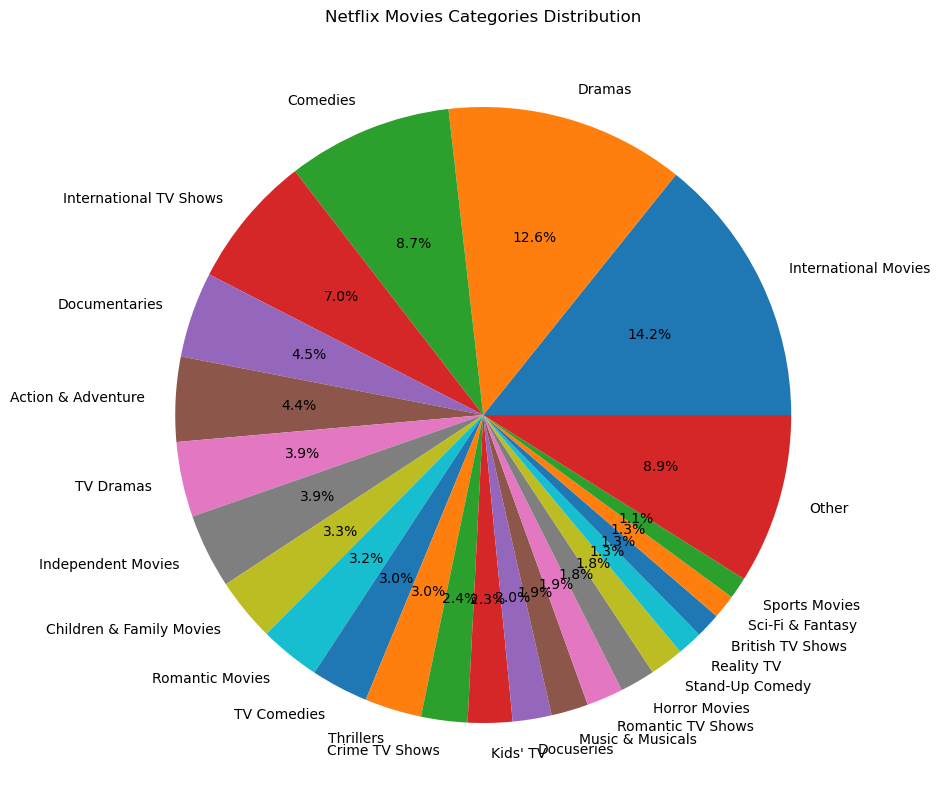

In [12]:
category_counts = netflix['listed_in'].str.split(', ').explode().value_counts()
category_percents = categories / categories.sum() * 100

# Collect categories below 1% and add as 'Other' category
other_percent = category_percents[category_percents < 1].sum()
category_percents = category_percents[category_percents >= 1]
category_percents.loc['Other'] = other_percent


plt.figure(figsize=(10,10))
plt.pie(category_percents, labels=category_percents.index, autopct='%1.1f%%')
plt.title("Netflix Movies Categories Distribution")
plt.show()


In [13]:



# get column 'listed_in' as an array and count categories
categories = netflix['listed_in'].str.split(', ').explode().value_counts()

# Calculate percentage of categories
category_percents = categories / categories.sum() * 100

# Print categories and percentage values ​​below 1%
other_percent = category_percents[category_percents < 1].sum()
other_categories = categories[category_percents < 1]

print(f"Categories below 1%: \n{other_categories}\n")
print(f"Total percentage of categories below 1%: {other_percent:.2f}%")


Categories below 1%: 
Anime Series                    176
Spanish-Language TV Shows       174
TV Action & Adventure           168
Korean TV Shows                 151
Classic Movies                  116
LGBTQ Movies                    102
TV Mysteries                     98
Science & Nature TV              92
TV Sci-Fi & Fantasy              84
TV Horror                        75
Anime Features                   71
Cult Movies                      71
Teen TV Shows                    69
Faith & Spirituality             65
TV Thrillers                     57
Movies                           57
Stand-Up Comedy & Talk Shows     56
Classic & Cult TV                28
TV Shows                         16
Name: listed_in, dtype: int64

Total percentage of categories below 1%: 8.93%


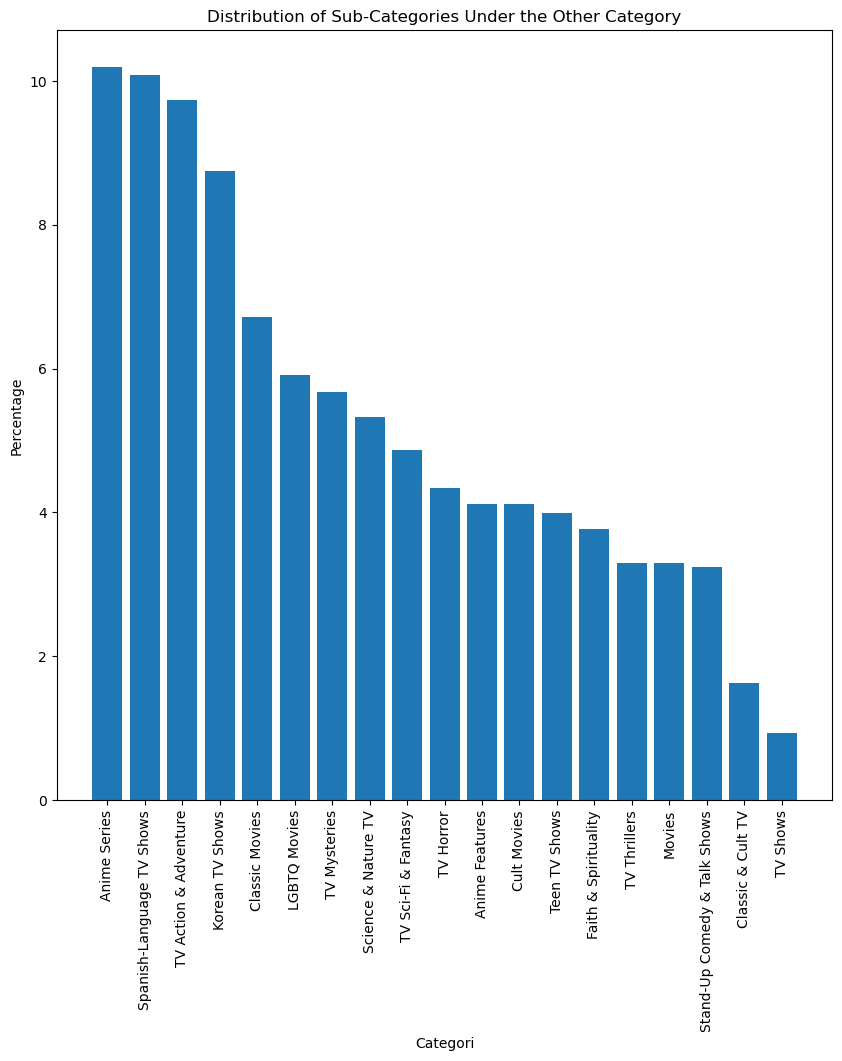

In [14]:
plt.figure(figsize=(10, 10))
other_category_percents = other_categories / other_categories.sum() * 100
plt.bar(other_category_percents.index, other_category_percents.values)
plt.xticks(rotation=90)
plt.xlabel("Categori")
plt.ylabel("Percentage")
plt.title("Distribution of Sub-Categories Under the Other Category")
plt.show()


In [15]:
num_types = len(netflix["type"].unique())
print("There are {} different types in the dataset.".format(num_types))
netflix['type'].unique()


There are 2 different types in the dataset.


array(['Movie', 'TV Show'], dtype=object)

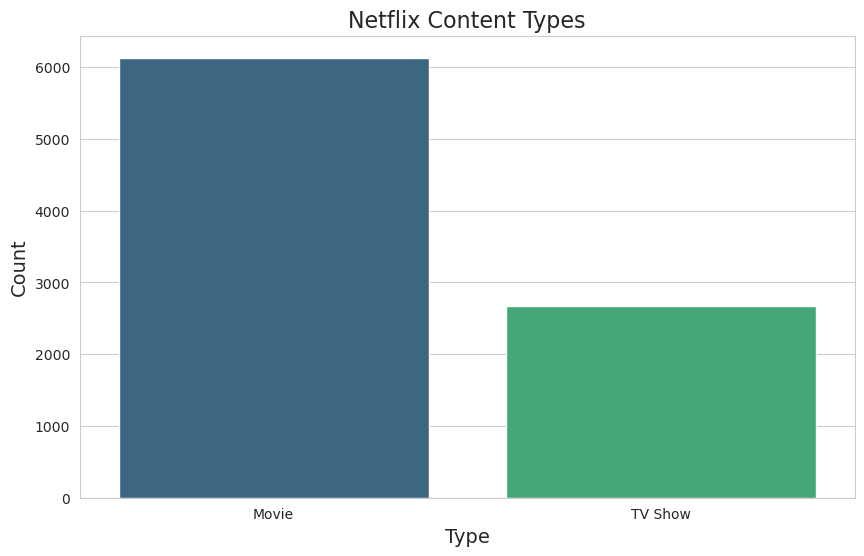

In [16]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
ax = sns.countplot(x="type", data=netflix, order=netflix['type'].value_counts().index, palette="viridis")
ax.set_xlabel("Type", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.set_title("Netflix Content Types", fontsize=16)
plt.show()

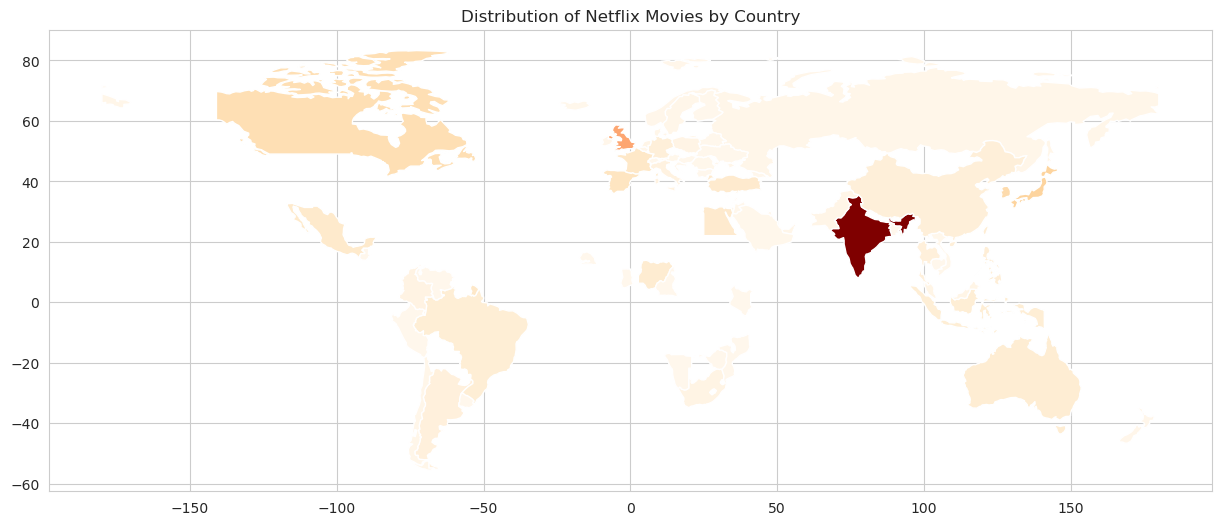

In [17]:
country_counts = netflix["country"].value_counts()
#geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world = world.merge(country_counts, left_on='name', right_index=True)


fig, ax = plt.subplots(figsize=(15, 10))
world.plot(column='country', cmap='OrRd', ax=ax)
plt.title("Distribution of Netflix Movies by Country")
plt.show()

In [18]:
import pandas as pd
import plotly.express as px

# select only movies in dataset
movies = netflix[netflix["type"] == "Movie"]

# group by country of manufacture
country_counts = movies["country"].value_counts().reset_index()
country_counts.columns = ["country", "count"]

# create world map
fig = px.choropleth(country_counts, locations="country", locationmode="country names", color="count", hover_name="country", title="Countries where Netflix Movies are Produced with Numbers")
fig.show()


In [19]:
word_counter = Counter()

# Process each row in the description column
for desc in netflix["description"]:
    # Text processing - only keep characters containing letters
    desc = re.sub(r"[^a-zA-Z\s]", "", str(desc))
    # Convert to lowercase
    desc = desc.lower()
    # Add the words to the Counter object
    word_counter.update(desc.split())

# Print the 30 most frequently used words
for word, count in word_counter.most_common(30):
    print(f"{word}: {count}")

a: 11612
the: 8146
to: 6443
and: 6340
of: 5278
in: 4353
his: 3355
with: 2268
her: 2167
an: 1994
for: 1791
on: 1778
their: 1669
when: 1517
this: 1396
from: 1291
as: 1224
is: 1119
by: 1005
after: 993
he: 872
that: 827
who: 813
but: 806
life: 774
at: 739
young: 728
into: 715
new: 699
up: 597


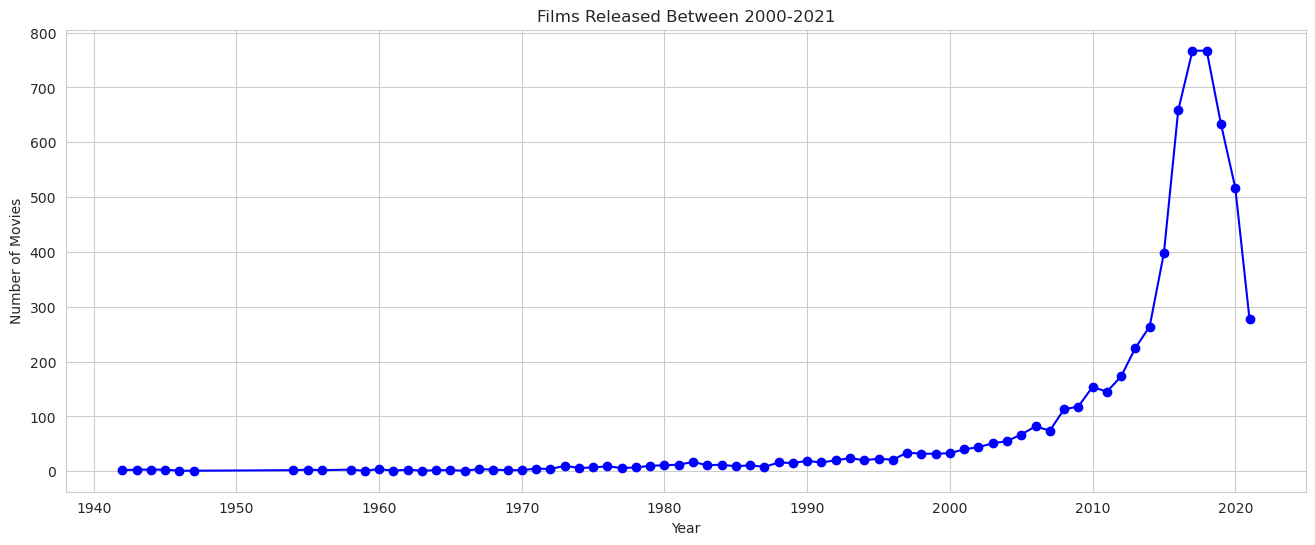

In [20]:

movie_df = netflix[netflix['type'] == 'Movie']

# Group movies by release year and calculate their number
year_counts = movie_df['release_year'].value_counts().sort_index()


plt.figure(figsize=(16, 6))
plt.plot(year_counts.index, year_counts.values, color='blue', marker='o')
plt.title('Films Released Between 2000-2021')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

In [21]:
print(netflix['duration'].isnull().sum())


3


In [22]:
netflix = netflix.dropna(subset=['duration']) #some values were NaN, I deleted them.

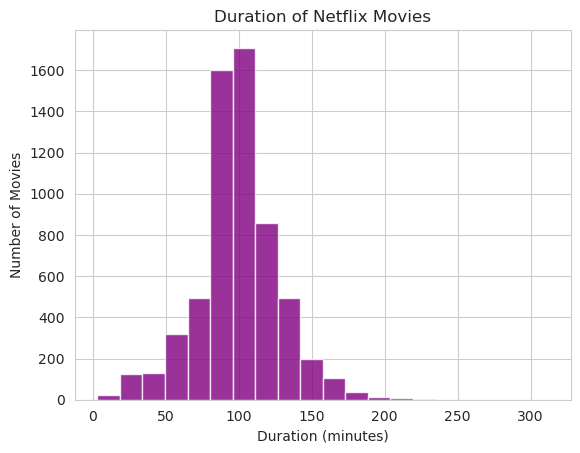

In [23]:

movie_durations = netflix[netflix['type'] == 'Movie']['duration']

movie_durations = movie_durations.str.replace(' min', '').astype(int)
plt.hist(movie_durations, bins=20, color='purple', alpha=0.8)
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.title("Duration of Netflix Movies")
plt.show()

In [24]:
netflix = netflix.dropna(subset=['release_year'])
netflix = netflix.dropna(subset=['duration'])